In [1]:
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(model.decision_function(X_test).shape)

(75, 2)
(25, 2)
(25,)


In [2]:
print(model.decision_function(X_test))
### 양성 클래스인 클래스 1에 속한다고 믿는 정도.
print(y_test)

### 1 => 4.13, 0 => -1.70, 0 => -3.95 ..... 0 => -7.69만큼 믿음의 수치 [6]
### 가장 안전한 수치를 기록한 -7.69 즉, 음성 가능성 수치가 -7.69 = 의심 수치 가장 낮은 7번째 데이터
### 가장 위험한 수치를 기록한 4.28 즉, 양성 가능성 수치가 4.28 = 양성 의심 수치 가장 높은 5번째 데이터

[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]
[1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]


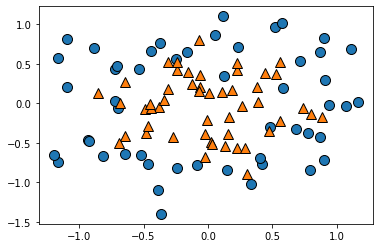

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [4]:
print(model.decision_function(X_test) > 0)
print(y_test)

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
[1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]


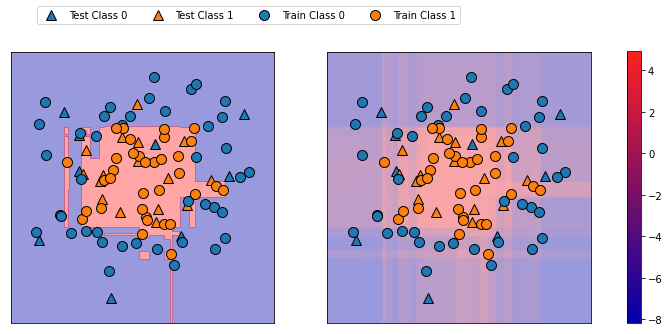

In [5]:
# Let's do visualization
fix, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(model, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(model, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['Test Class 0', 'Test Class 1', 'Train Class 0', 'Train Class 1'], ncol=4, loc=(.1, 1.1))

In [6]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [7]:
model.predict_proba(X_test)  # [0.015, 0.985][0] => 0에 대한 확률 1.5%, 1에 대한 확률 98.5%
                             # 두 클래스에 대한 확률의 합은 항상 1이다.

array([[1.57362639e-02, 9.84263736e-01],
       [8.45756526e-01, 1.54243474e-01],
       [9.81128693e-01, 1.88713075e-02],
       [9.74070327e-01, 2.59296728e-02],
       [1.35214212e-02, 9.86478579e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.99543275e-01, 4.56725221e-04],
       [1.61426376e-02, 9.83857362e-01],
       [2.48329911e-01, 7.51670089e-01],
       [3.20518935e-02, 9.67948107e-01],
       [9.98441637e-01, 1.55836338e-03],
       [1.35214212e-02, 9.86478579e-01],
       [1.98099245e-02, 9.80190075e-01],
       [7.68580365e-01, 2.31419635e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.84817480e-01, 1.51825198e-02],
       [7.73836215e-01, 2.26163785e-01],
       [9.80463909e-01, 1.95360915e-02],
       [1.73607896e-02, 9.82639210e-01],
       [1.61426376e-02, 9.83857362e-01],
       [1.61426376e-02, 9.83857362e-01],
       [3.41393574e-01, 6.58606426e-01],
       [6.30759509e-02, 9.36924049e-01],
       [9.34424749e-01, 6.55752512e-02],
       [8.661995

In [8]:
# 보스턴 주택가격 데이터 Chapter 10 
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
### Load to DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()
# df.to_csv('my_boston.csv')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# 데이터 추가작업 
df['PRICE'] = boston.target
df.shape
# df.to_csv('my_boston.csv')

(506, 14)

In [12]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
y = df['PRICE']

In [16]:
X = df.drop(['PRICE'], axis=1, inplace = False)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [18]:
lr = LinearRegression().fit(X_train, y_train)

In [19]:
y_predict = lr.predict(X_test)

In [20]:
print(y_test[:5])

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
Name: PRICE, dtype: float64


In [21]:
print(y_predict[:5])

[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641]


In [22]:
### ERROR
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(mse, rmse)

17.29691590790215 4.158956107955715


In [23]:
### 절편
lr.intercept_

40.995595172164336

In [24]:
### 계수 Coefficient
print(np.round(lr.coef_, 2))
# 4번째 값(RM)이 가장 크게 나왔음 ((3.05)) ==> 주택 1가구당 평균 방의 개수가 집값을 결정하는데 가장 큰 비중을 차지함을 알 수 있다.

[-1.10e-01  7.00e-02  3.00e-02  3.05e+00 -1.98e+01  3.35e+00  1.00e-02
 -1.74e+00  3.60e-01 -1.00e-02 -9.20e-01  1.00e-02 -5.70e-01]


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

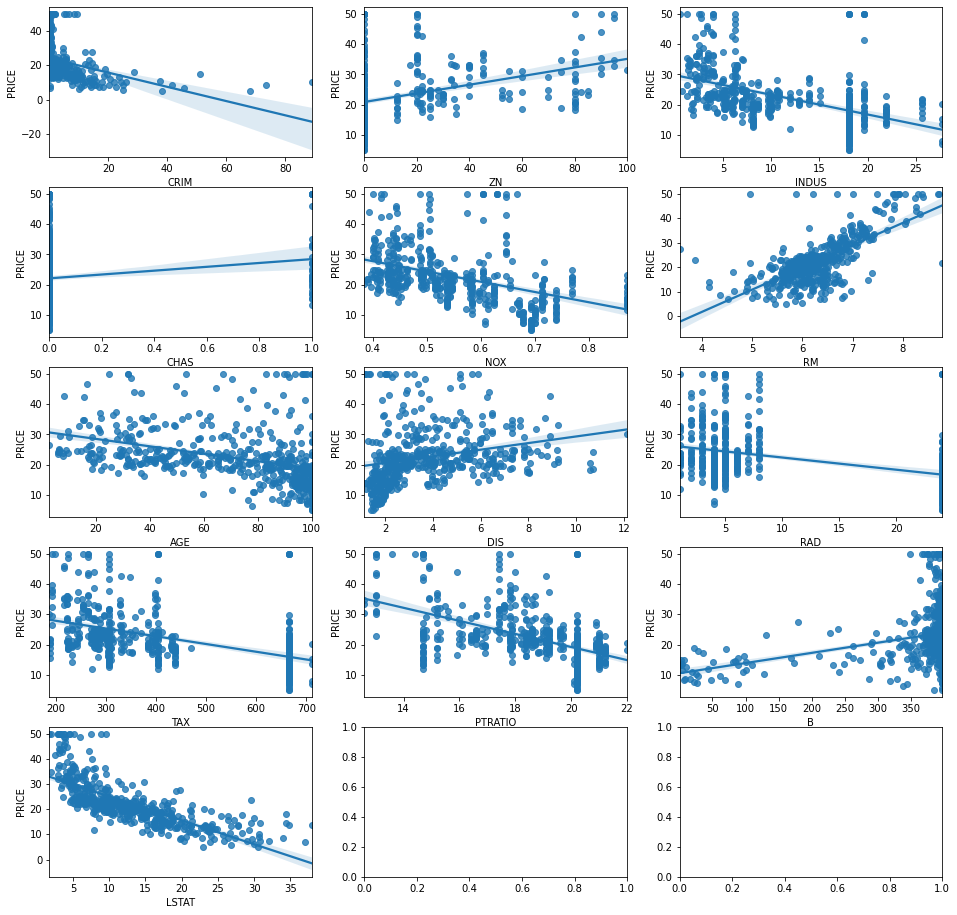

In [26]:
fig, axs = plt.subplots(figsize=(16, 16), ncols = 3, nrows = 5)
x_features = X_train.columns
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'PRICE', data = df, ax = axs[row][col])
    
    # 해석
    ## 'CRIM'이 낮을수록 PRICE가 높음
    ## 'INDUS'가 낮아질수록 가격이 낮아짐
    ## 'CHAS' => 찰스 강의 경계에 있으면 가격이 올라가는 추세를 보임
    ## 'NOX' => 일산화질소의 농축도가 높아질수록 가격은 떨어짐
    ## 'RM' => 평균 방의 개수가 많아질 수록 가격은 올라감, 주택가격에 가장 많은 영향을 미침
    ## 'DIS' => 고용센터가 멀리 위치할수록 가격 올라감, 고용이 안정된 사람일수록 높은 가격의 집에 거주
    ## 'RAD' => 고속도로의 접근성이 좋을수록 집값이 쌈, 고속도로 소음문제때문에 가격이 싸다
    ## 'TAX' => 재산세 비율이 높을수록 가격이 떨어짐
    ## 'B' => 거주구역에 흑인이 많이 살수록 가격이 높아짐???
    ## 'LSTAT' => 하위계층의 비율이 높을수록 가격이 떨어짐

In [ ]:
# 회귀분석 + 산점도/선형 회귀 그래프

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('auto-mpg.csv', header = 0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [37]:
df = df.drop(['car name', 'origin', 'horsepower'], axis=1, inplace=False)

In [38]:
df.shape

(398, 6)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
y = df['mpg']
X = df.drop(['mpg'], axis=1, inplace=False)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
y_answer = lr.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_answer)
rmse = np.sqrt(mse)
print(mse,rmse)
print(r2_score(y_test, y_answer))  # R^2값(계수)

12.278239036609444 3.5040318258556735
0.8078579451877173


In [54]:
print(np.round(lr.intercept_, 2)) # y 절편
print(np.round(lr.coef_, 2))      # 회귀 계수

-17.55
[-0.14  0.01 -0.01  0.2   0.76]


In [55]:
X_train[:2]

,cylinders,displacement,weight,acceleration,model year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81


In [61]:
df

,mpg,cylinders,displacement,weight,acceleration,model year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


In [56]:
### 시각화
import seaborn as sns

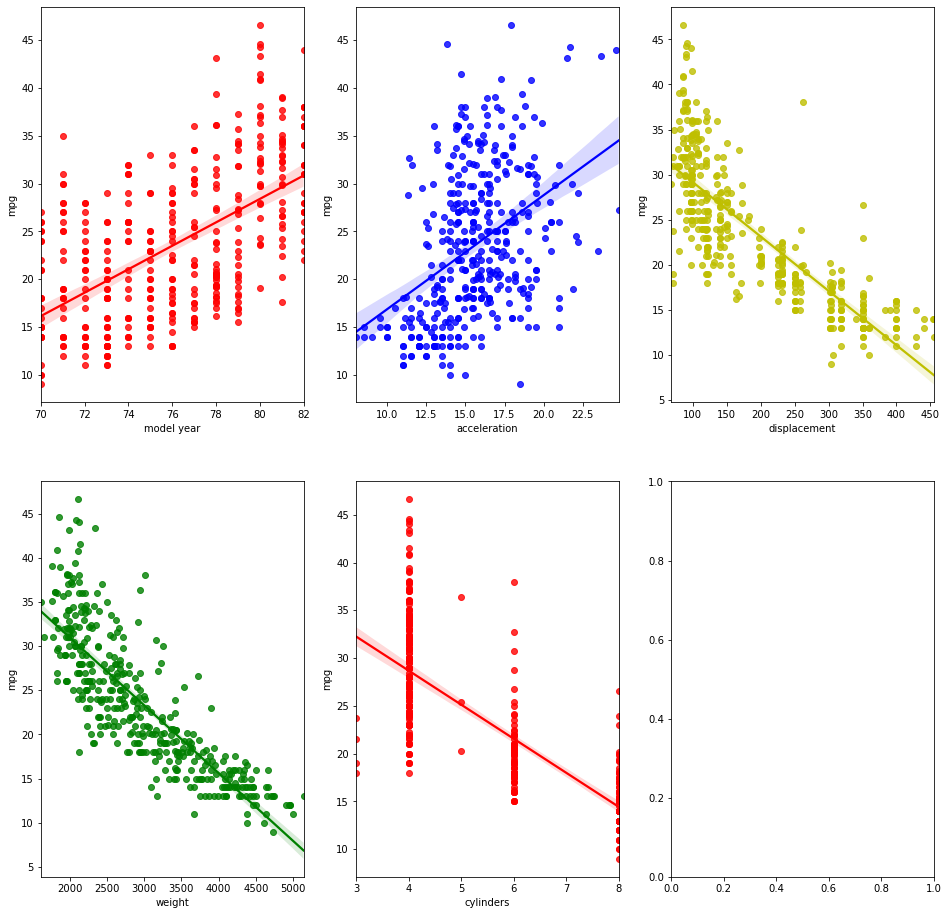

In [57]:
fig, axs = plt.subplots(figsize=(16, 16), ncols = 3, nrows = 2)
x_features = ['model year', 'acceleration', 'displacement', 'weight', 'cylinders'] # 영향이 큰 순서대로
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = df, ax = axs[row][col], color = plot_color[i])

In [65]:
df.corr(method = 'kendall')

,mpg,cylinders,displacement,weight,acceleration,model year
mpg,1.000000,-0.686477,-0.679847,-0.694006,0.301096,0.413661
cylinders,-0.686477,1.000000,0.794854,0.735481,-0.367194,-0.273742
displacement,-0.679847,0.794854,1.000000,0.800508,-0.352110,-0.218920
weight,-0.694006,0.735481,0.800508,1.000000,-0.268619,-0.196863
acceleration,0.301096,-0.367194,-0.352110,-0.268619,1.000000,0.196024
model year,0.413661,-0.273742,-0.218920,-0.196863,0.196024,1.000000


In [ ]:
# 결정트리분석 + 산점도/선형회귀 그래프

In [66]:
pd.__version__

'1.2.4'

In [ ]:
!pip uninstall pandas

In [1]:
!pip install pandas == 0.24.2

ERROR: Invalid requirement: '=='
